In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv

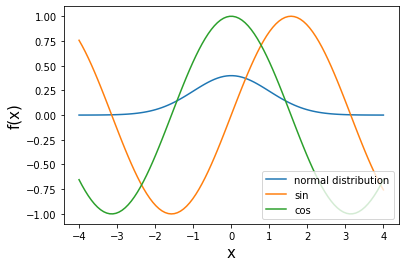

In [9]:
#Lets plot a few random functions
x = np.linspace(start=-4, stop=4, num=100)
y = stats.norm.pdf(x, 0, 1) 
plt.plot(x, y,label='normal distribution')
line1, = plt.plot(x, np.sin(x), label='sin')
line2, = plt.plot(x, np.cos(x), label='cos')
plt.legend(loc='lower right')
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.show()

8.418871701475581 8.418871701475581
2.886751345948129


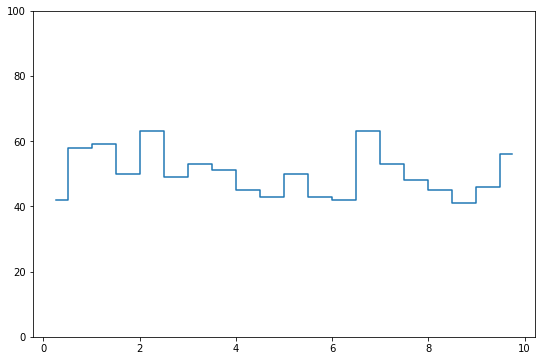

In [30]:
fig, ax = plt.subplots(figsize=(9,6))
bkg = np.random.uniform(0,10, 1000)
histy, bin_edges = np.histogram(bkg, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.set_ylim([0,100])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
print(bkg.var(),bkg.std()*bkg.std())
print(10./np.sqrt(12.))
#print(len(bin_centers),len(bin_edges))

4.999517830480749


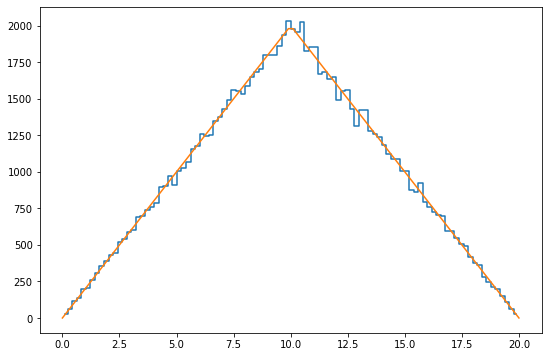

In [33]:
bkg1 = np.random.uniform(0,10, 100000)
bkg2 = np.random.uniform(0,10, 100000)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=100)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')
def function(ix,norm=100000/(100/20)):#note the norm is for 100 bins over 0-20
    if ix < 10:
        return norm*(ix/100)
    else: 
        return norm*(20-ix)/100
x = np.linspace(start=0, stop=20, num=100)
y = np.array(list(map(function, x)))
plt.plot(x, y,label='analytic pdf')
exp = bkg1.mean()
print(exp)

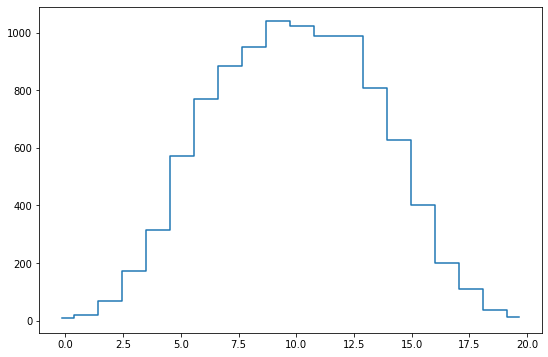

In [34]:
#Sample something crazy
bkg1 = np.random.uniform(0,10, 10000)
bkg2 = np.random.normal (5,2 , 10000)
data = bkg1+bkg2
fig, ax = plt.subplots(figsize=(9,6))
histy, bin_edges = np.histogram(data, bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
#ax.set_ylim([0,150])
plt.plot(bin_centers,histy,drawstyle = 'steps-mid')

/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


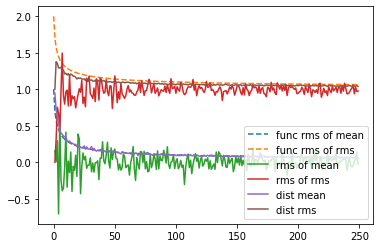

In [35]:
import math
#Lets get the normal mean and variance
def sample(iN):
    sample  = np.random.normal (0,1,iN)
    return sample.mean(),sample.std()

#now lets get the mean and variance of the mean itself
def meansample(iN):
    ntoys=100
    allmeans=np.array([])
    allrmses=np.array([])
    for i0 in range(ntoys):
        pMean,pRMS=sample(iN)
        allmeans=np.append(allmeans,pMean)
        allrmses=np.append(allrmses,pRMS)
    return allmeans.std(),allrmses.std()
nvar=[]
mean=[]
rms=[]

distmean=[]
distrms=[]

funcrms=[]
funcmean=[]
for i0 in range(250):
    funcmean.append(1./math.sqrt(1+i0))
    funcrms .append(1+1./math.sqrt(1+i0))
    pMean,pRMS=sample(i0)
    distmean.append(pMean)
    distrms.append(pRMS)
    pMean,pRMS=meansample(i0)
    nvar.append(i0)
    mean.append(pMean)
    rms.append(1+pRMS)

plt.plot(nvar,funcmean,'--',label='func rms of mean')
plt.plot(nvar,funcrms,'--',label='func rms of rms')
plt.plot(nvar,distmean,label='rms of mean')
plt.plot(nvar,distrms,label='rms of rms')
plt.plot(nvar,mean,label='dist mean')
plt.plot(nvar,rms,label='dist rms')
plt.legend(loc='lower right')